#Analyze sources, for PGWAVE guys

In [1]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw972'))
from uw.like2.analyze import (sourceinfo, ); 
map(reload, (sourceinfo,));

In [2]:
self = sourceinfo.SourceInfo()

loading sources.pickle


In [ ]:
df = self.df

In [41]:
df['associated'] = [t['prob'][0]>0.8 if t is not None else False for t in df.associations]
df['aname'] = [(t['name'][0] if t is not None else None) for t in df.associations]
df['aprob']= [(t['prob'][0] if t is not None else None) for t in df.associations]
df['acat']= [(t['cat'][0] if t is not None else None) for t in df.associations]

In [38]:
pg = np.array([n.startswith('PGW') for n in df.index]); sum(pg)

42

In [39]:
df[pg&(df.ts>5)]['ts acat aname aprob fitqual locqual'.split()].sort_index(by='ts')

,ts,acat,aname,aprob,fitqual,locqual
name,,,,,,
PGW_1952,5.212539,None,None,NaN,11.6,0.41
PGW_3797,8.348395,agn,ELAIS J00347-4252,0.152166,6.02,1.19
PGW_3422,9.350345,qso,SDSS J10050+4133,0.017637,7.53,4.53
PGW_5020,9.419941,None,None,NaN,6.25,3.78
PGW_6594,9.603764,None,None,NaN,8.01,2.82
PGW_4507,10.02594,None,None,NaN,9.99,3.44
PGW_6069,10.17479,None,None,NaN,11.41,2.51
PGW_2301,10.45743,None,None,NaN,10.65,3.17
PGW_2971,10.53349,None,None,NaN,5.84,1.26


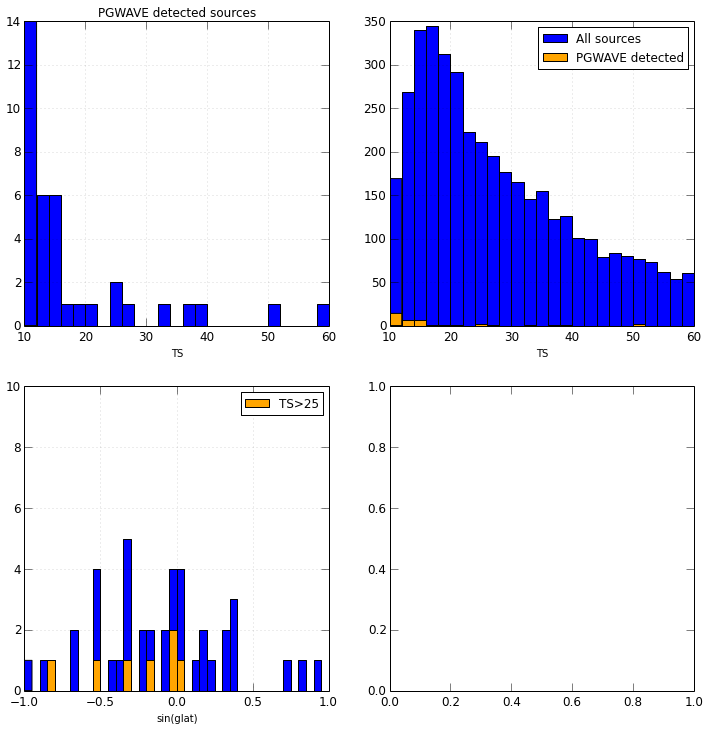

In [60]:
fig,axx = plt.subplots(2,2, figsize=(12,12)) #
ax=axx[0,0]
ax.hist(df.ts[pg].clip(0,60), np.linspace(10, 60, 26))
plt.setp(ax, xlabel='TS', title='PGWAVE detected sources')
ax.grid(True, alpha=0.3); #ax.legend()
ax=axx[0,1]
ax.hist(df.ts, np.linspace(10, 60, 26), label='All sources')
plt.setp(ax, xlabel='TS')
ax.hist(df.ts[pg].clip(0,50),np.linspace(10, 60, 26),color='orange',  label='PGWAVE detected')
ax.legend()
ax.grid(True, alpha=0.3)
ax=axx[1,0]
df['singlat'] = np.sin(np.radians(np.asarray(df.glat,float)))
ax.hist(df.singlat[pg], np.linspace(-1,1,41) )
ax.hist(df.singlat[ pg &(df.ts>25)], np.linspace(-1,1,41), color='orange' ,label='TS>25')
plt.setp(ax, xlabel='sin(glat)', ylim=(0,10))
ax.legend()
ax.grid(True, alpha=0.3)       